# Machine Learning Regression

In [1]:
import pandas as pd
import numpy as np

# Data Preparation

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
df = data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [4]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

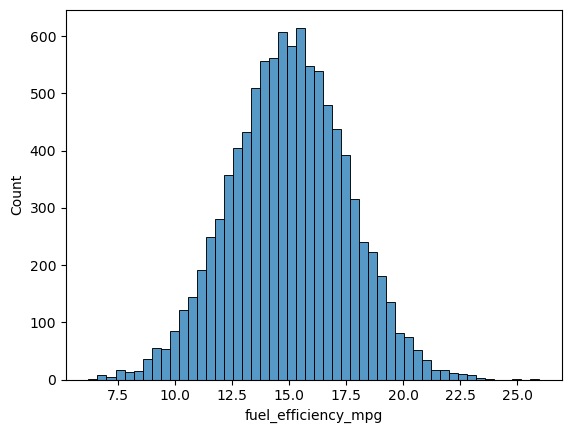

In [7]:
sns.histplot(df.fuel_efficiency_mpg , bins = 50)

In [8]:
#Missing Values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
#Median horsepower
median_horsepower = df['horsepower'].median()
median_horsepower

149.0

In [10]:
def prepare_X(df):
    ones = np.ones(df.shape[0])
    X = np.column_stack([ones, df])
    return X

In [11]:
def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [12]:
def train_linear_regression_reg(X, y, r):
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [13]:

def rmse(y, y_pred):
    se = (( y - y_pred) ** 2)
    mse = se.mean()
    return np.sqrt(mse)

In [14]:
# Splitting Dataset
def split_dataset(df, seed=42):
    np.random.seed(seed)
    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)

    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    n_test = n - n_train - n_val

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test


In [16]:
# Imputing missing values and comparing
df_train, df_val, df_test = split_dataset(df, seed=42)

for fill_value in ['zero', 'mean']:
    df_train_num = df_train.copy()
    df_val_num = df_val.copy()

    if fill_value == 'zero':
        df_train_num = df_train_num.fillna(0)
        df_val_num = df_val_num.fillna(0)
    else:
        mean_hp = df_train_num['horsepower'].mean()
        df_train_num['horsepower'] = df_train_num['horsepower'].fillna(mean_hp)
        df_val_num['horsepower'] = df_val_num['horsepower'].fillna(mean_hp)

    X_train = prepare_X(df_train_num[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
    y_train = df_train_num['fuel_efficiency_mpg'].values

    X_val = prepare_X(df_val_num[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
    y_val = df_val_num['fuel_efficiency_mpg'].values

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val[:, 1:].dot(w)
    score = rmse(y_val, y_pred)

    print(fill_value, 'RMSE:', round(score, 2))

zero RMSE: 0.52
mean RMSE: 0.46


In [20]:
# Regularised Regression
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
scores = {}

df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

X_train = prepare_X(df_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
y_train = df_train['fuel_efficiency_mpg'].values

X_val = prepare_X(df_val[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
y_val = df_val['fuel_efficiency_mpg'].values

for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_val[:, 1:].dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = round(score, 2)
    print(r, scores[r])

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.52
10 0.52
100 0.52


In [24]:
# Different seeds for range(10)
rmse_scores = []

for seed in range(10):
    df_train, df_val, df_test = split_dataset(df, seed)
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)

    X_train = prepare_X(df_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
    y_train = df_train['fuel_efficiency_mpg'].values

    X_val = prepare_X(df_val[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
    y_val = df_val['fuel_efficiency_mpg'].values

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val[:, 1:].dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

std_rmse = np.std(rmse_scores)
print("Standard deviation of RMSE:", round(std_rmse, 3))

Standard deviation of RMSE: 0.007


In [27]:
# Q6
df_train, df_val, df_test = split_dataset(df, seed=9)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)

X_full_train = prepare_X(df_full_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
y_full_train = df_full_train['fuel_efficiency_mpg'].values

X_test = prepare_X(df_test[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values)
y_test = df_test['fuel_efficiency_mpg'].values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test[:, 1:].dot(w)

score = rmse(y_test, y_pred)
print("Test RMSE:", round(score, 3))

Test RMSE: 0.516
